In [1]:
from math import sin,cos,tan,asin,acos,atan,pi,sqrt,log
import numpy as np
import sympy as sy

mm=0.001

知识重点
---
1. $\tau=\frac{T \cdot r}{J} $
2. $J=\int{r^2 \cdot dA} $ 

重点题目
---
1. T4⭐
2. T7⭐
    
T5.6存疑 为什么×ro

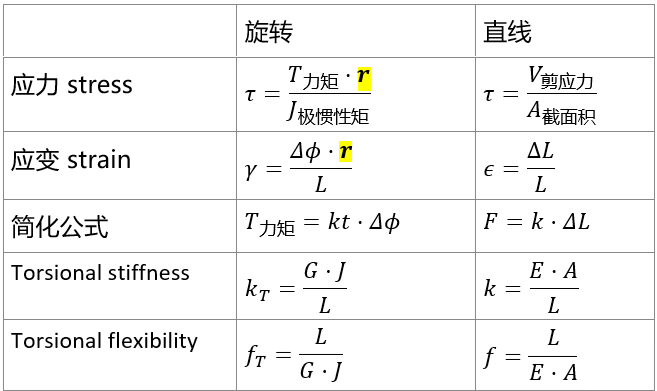

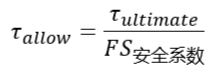

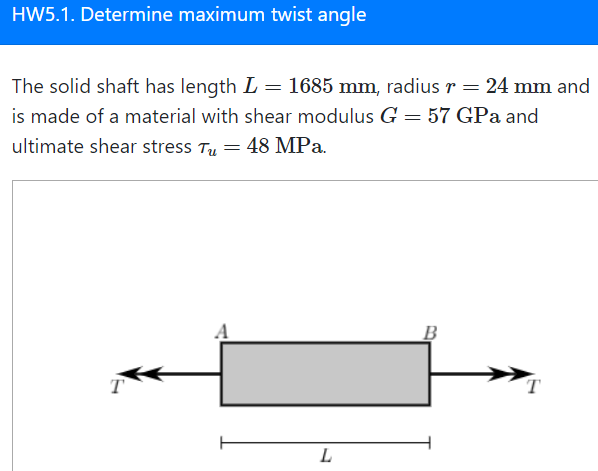
#计算最大扭转角度Φ

In [8]:
#HW5.1
########################
L = 1685 # mm
r = 24 # mm
G = 57 # GPa
tu = 48 # MPa
FS = 3
########################

L*=mm
r*=mm
G*=1e9
tu*=1e6

J=pi*r**4
tu_allow=tu/FS

phi=sy.S('phi')

equ=(tu_allow/r)/(phi/L)-G
phi=sy.solve([equ],[phi])[phi]
phi

NameError: name 'mm' is not defined

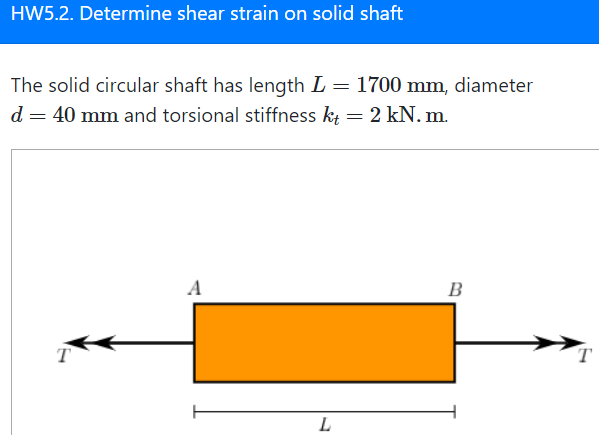
#计算shear_strain

In [3]:
#HW5.2 没什么问题
########################
L = 1700 # mm
d = 40 # mm
kt = 2 # kN.m
T = 1504 # N.m
########################

L*=mm
d*=mm
kt*=1000

r=d/2

delta_phi=T/kt
shear_strain=delta_phi*r/L

shear_strain*1000

8.84705882352941

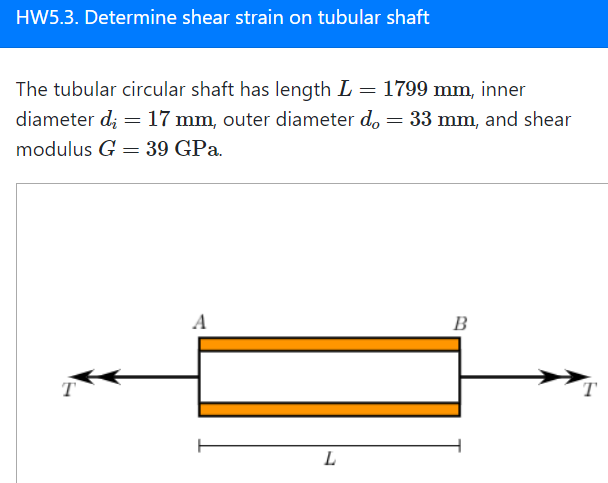
#求内表面的shear_strain

In [3]:
#HW5.3 没什么问题
########################
L = 1799 # mm
di = 17 # mm
do = 33 # mm
G = 39 # GPa
T = 1511 # N.m
########################

L*=mm
di*=mm
do*=mm
G*=1e9

ri=0.5*di
ro=0.5*do

#计算极惯性矩
J=pi/2*(ro**4-ri**4)

#G剪切模量→kt剪切系数
kt=G*J/L
delta_phi=T/kt

shear_strain=delta_phi*ri/L

shear_strain*1000

3.0428439754393324

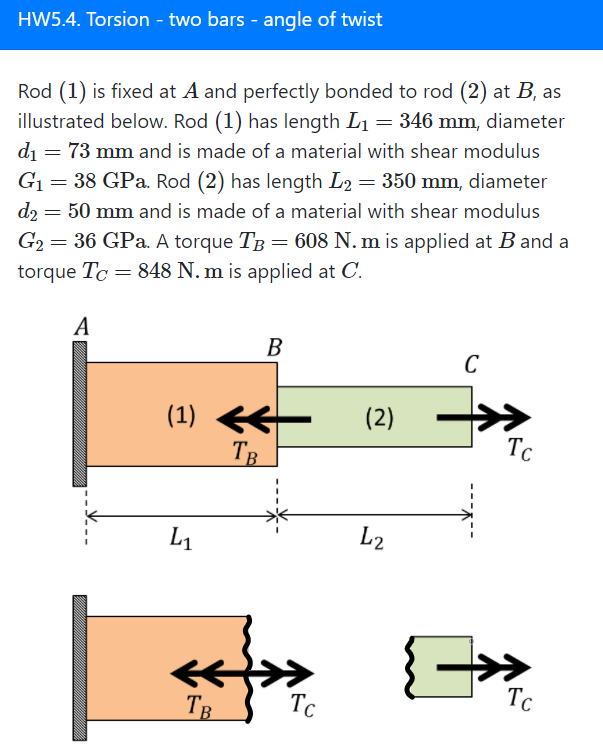!



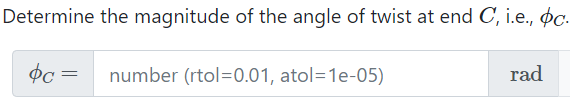

In [5]:
#HW5.4 ⭐注意内力矩默认方向
#######################
L1 = 346 # mm
L2 = 350 # mm
d1 = 73 # mm
d2 = 50 # mm
G1 = 38 # GPa
G2 = 36 # GPa
TB = 608 # N.m
TC = 848 # N.m
########################

#单位转化
l1=L1*mm
l2=L2*mm
d1*=mm
d2*=mm
G1*=1e9
G2*=1e9

r1=d1/2
r2=d2/2

#计算J惯量
J1=pi/2*r1**4
J2=pi/2*r2**4

#剪切模量→剪切系数
k1=G1*J1/l1
k2=G2*J2/l2

#分别计算转动角度
d_phi1=(-TB+TC)/k1
d_phi2=(TC)/k2

print(d_phi1+d_phi2)

0.014220168348514627


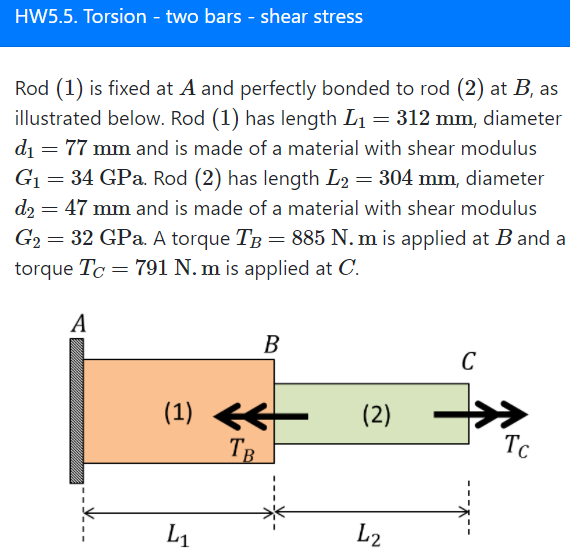
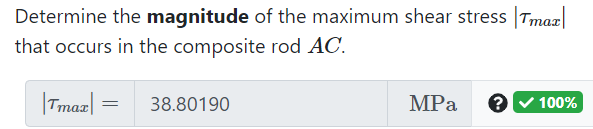

In [6]:
#HW5.5 和上面题目类似
#######################
L1 = 302 # mm
L2 = 336 # mm
d1 = 64 # mm
d2 = 48 # mm
G1 = 41 # GPa
G2 = 42 # GPa
TB = 557 # N.m
TC = 774 # N.m
#######################

#单位转化
l1=L1*mm
l2=L2*mm
d1*=mm
d2*=mm
G1*=1e9
G2*=1e9

r1=d1/2
r2=d2/2

#计算J惯量
J1=pi/2*r1**4
J2=pi/2*r2**4

#分别计算tau

tau2=r2*TC/J2
tau1=r1*(TC-TB)/J1

tau2=tau2/1000000 
tau1=tau1/1000000
max(tau1,tau2)  #这里问的是AC段中tau最大的一段，所以要用max函数

35.644075796622396

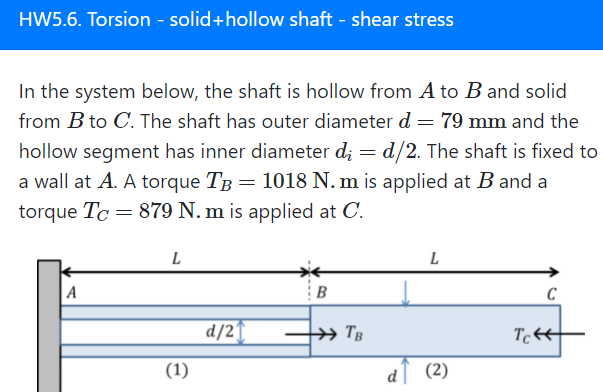

In [7]:
#5.6 跟上一题差不多
#######################复制部分
d = 72 # mm
TB = 1387 # N.m
TC = 759 # N.m
#######################复制部分

d*=mm
ro=d/2
ri=d/4

J1=pi/2*(ro**4-ri**4)
J2=pi/2*ro**4

tau2=TC*ro/J2/1000000
tau1=abs((TC-TB)*ro/J1/1000000) ####为什么这里乘的是ro

max(tau1,tau2) 

10.356533076710264

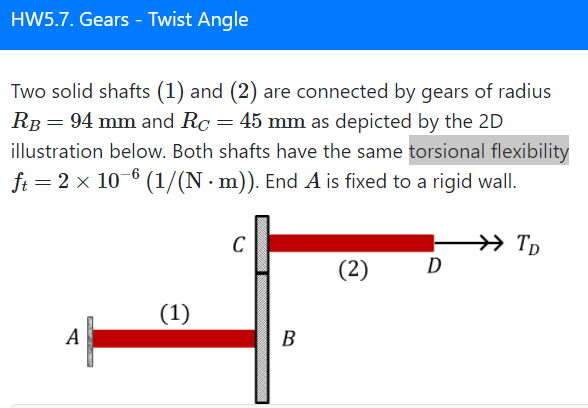

In [11]:
#5.7⭐
#######################复制部分
Rb = 105 # mm
Rc = 37 # mm
ft = 0.000004 # (1/N.m)
TD = 680 # N.m
#######################复制部分

#单位转化
rb=Rb*mm
rc=Rc*mm

td=TD
tb=td*rb/rc

kt=1/ft

theta1=tb/kt
theta2=td/kt

print(theta1*rb/rc+theta2) #这里×(rc/rb)非常重要

0.024625040175310444


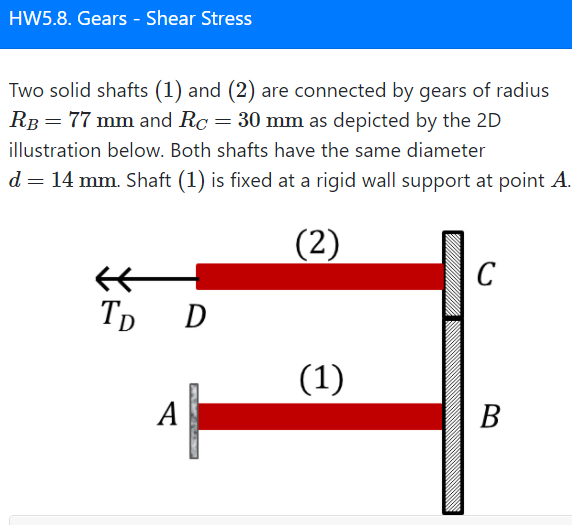

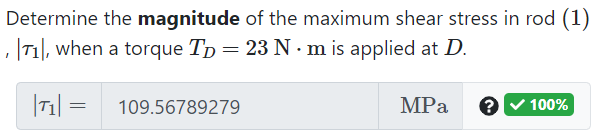

In [9]:
#5.8
#######################复制部分
Rb = 77 # mm
Rc = 30 # mm
d = 14 # mm
TD = 23 # N.m
#######################复制部分

#单位转化
rb=Rb*mm
rc=Rc*mm
d=d*mm
r=d/2
td=TD

#计算B处力矩
tb=td*(rb/rc)

#自定义计算圆的极惯性矩
def j(r):
    return pi/32*(2*r)**4

j=j(r)

#τ计算公式
tau1=tb*r/j

tau1/1000000

109.5678927952368

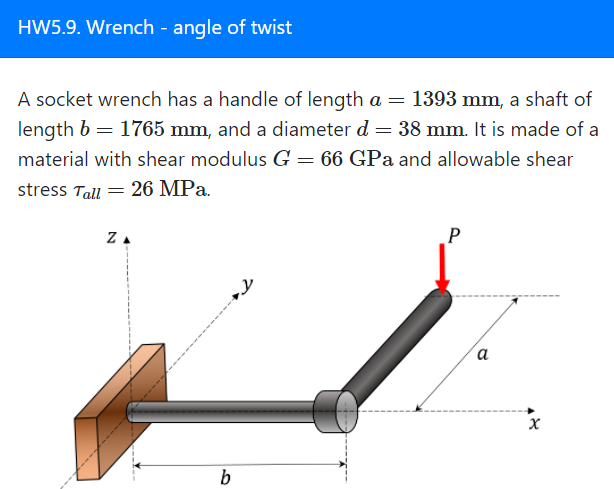

In [10]:
#5.9
#######################复制部分
a = 1207 # mm
b = 1515 # mm
d = 35 # mm
G = 65 # GPa
tall = 27 # MPa
#######################复制部分

#单位转化
a=a*mm
b=b*mm
d=d*mm
r=d/2
G=G*1e9
tall=tall*1e6

p=sy.S('p')

#自定义计算圆的极惯性矩
def j(r):
    return pi/32*(2*r)**4
j=j(r)

#计算torque
tor=p*a

#剪切模量→剪切系数
kt=G*j/b

phi=tor/kt

shear_stress=tor*r/j
equ=shear_stress-tall

p_v=sy.solve([equ],[p])[p]

print(p_v)
print(phi.subs(p,p_v))

188.317429350243
0.0359604395604396
